In [1]:
import sys
sys.path.append('../modules')
from wrangling import wrangling_serie_sistema as wr
from grafo_estacionalidad import Grafo_Estacionalidad as graf

In [4]:
wr().to_excel('ayporfavor.xlsx')

In [3]:
import pandas as pd
df_bien = pd.read_excel('ayporfavor.xlsx')

In [13]:
df = wr()
for i in range(12):
    
    print(df.loc[df.Mes_num == i+1].ITI.mean())

101.5297250585847
107.0096465100698
105.59997841674083
118.05083168102459
117.48891708198566
113.39344530234872
108.74039610636324
110.92891483053403
110.92867303410021
109.28561865611691
107.58258902250323
107.85814942200865


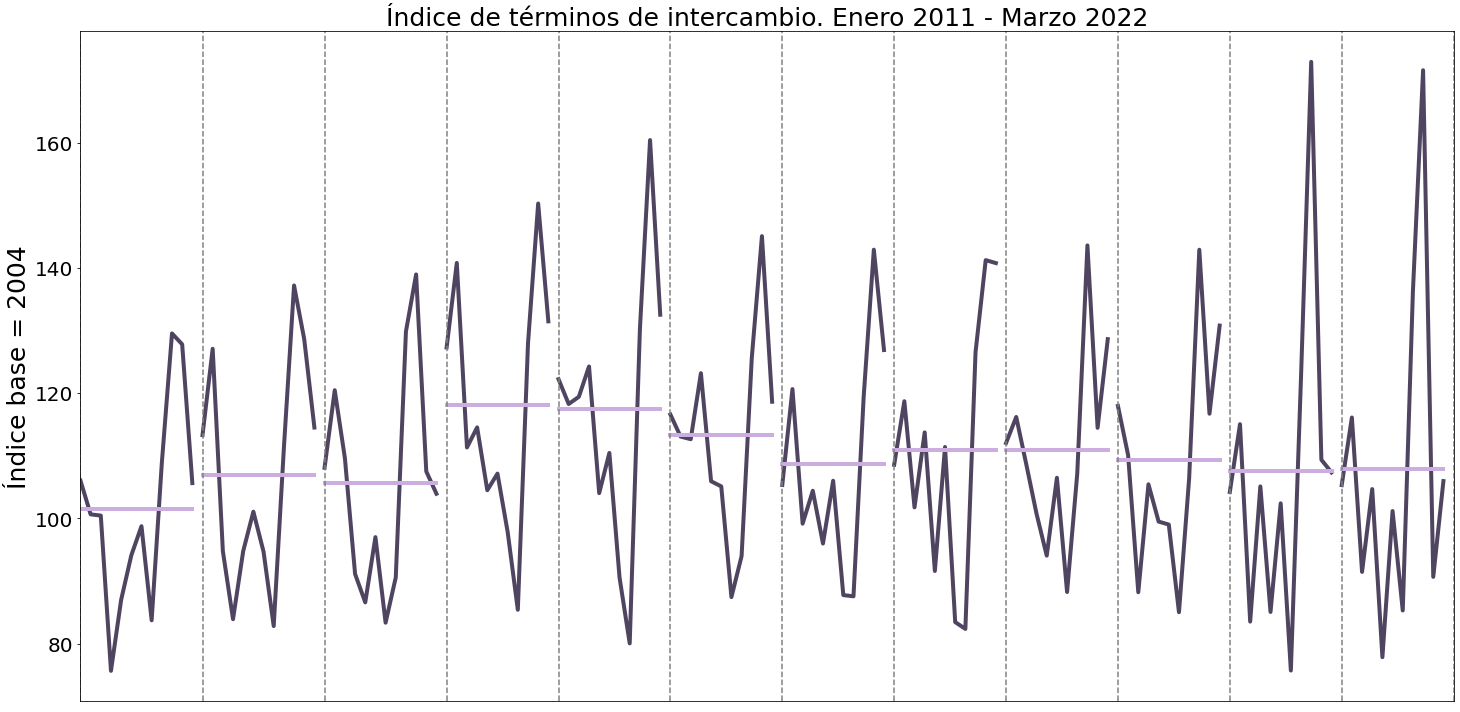

In [5]:
iti = graf(df_bien, 'ITI')


iti.set_title('Índice de términos de intercambio. Enero 2011 - Marzo 2022')
iti.set_size(20,10)
iti.set_colors('#4f4561', '#cbade0')
iti.set_lineWidth(4)

iti.hacer_grafo()
iti.set_ylabel('Índice base = 2004')
iti.print('../output/ITI(marzo2022).pdf')

In [19]:
datos = iti.get_columns_data()[0]
iti2021 = datos[10]
iti2022 = datos[11]
tablaGabi = iti.get_dfs_tablas()[0].join(iti2021).join(iti2022)
del tablaGabi['Ultimo Año']
tablaGabi.rename(columns = {10:2021, 11:2022}, inplace= True)
tablaGabi = tablaGabi.transpose()

In [20]:
tablaGabi.to_excel('../output/tablas/tablaITI-marzo2022.xlsx')